## Calculating the union area using image processing
This is my take on how to solve this problem.

***The answer to [this challenge](https://www.reddit.com/r/dailyprogrammer/comments/23b1pr/4182014_challenge_158_hard_intersecting_rectangles/) is approximately 18 units squared!***

### Steps:
0. You have to increase the resolution of step 1 till step 3 and downscale back in step 4. 100 is a good scale!
1. Create a blank black canvas
2. Draw the rectangles and other shapes on the canvas (keep their color white)
3. Convert the image into grayscale using the conversion formula
4. Count all the non-white pixels
5. Result = step 4

### To learn more about image processing
Check out these [tutorials](https://github.com/ZainUlMustafa/Python-3-Tutorial-Using-Jupyter-Notebook/) that I co-authored.

In [1]:
import cv2
import numpy as np
print("Import successful!")

Import successful!


In [2]:
rects = [
    [0, 1, 3, 3],
    [2, 2, 6, 4],
    [1, 0, 3, 5]
]

allXCoors, allYCoors = [], []
for eachRect in rects:
    for i in range(0, 4, 2):
        allXCoors.append(eachRect[i])
    #endfor

    for i in range(1, 4, 2):
        allYCoors.append(eachRect[i])
    #endfor
#endfor

In [3]:
lowestXCoor, highestXCoor = 0, 0
for eachX in allXCoors:
    if eachX <= lowestXCoor:
        lowestXCoor = eachX
    #endif

    if eachX >= highestXCoor:
        highestXCoor = eachX
    #endif
#endfor

lowestYCoor, highestYCoor = 0, 0
for eachY in allYCoors:
    if eachY <= lowestYCoor:
        lowestYCoor = eachY
    #endif

    if eachY >= highestYCoor:
        highestYCoor = eachY
    #endif
#endfor

print(lowestXCoor, highestXCoor)
print(lowestYCoor, highestYCoor)


0 6
0 5


In [4]:
canvasWidth = highestXCoor - lowestXCoor
canvasHeight = highestYCoor - lowestYCoor
print(f"Width: {canvasWidth}, Height: {canvasHeight}")

Width: 6, Height: 5


In [5]:
import matplotlib.pyplot as plt
print("Plot successful: for visuals only")

Plot successful: for visuals only


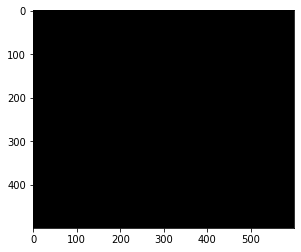

In [6]:
scale = 100 #to achieve higher resolution 

canvas = np.zeros((canvasHeight*scale,canvasWidth*scale,3), np.uint8)
canvas = cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)
plt.imshow(canvas)

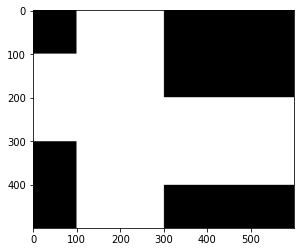

In [7]:
for eachRect in rects:
    img = cv2.rectangle(canvas, (eachRect[0]*scale,eachRect[1]*scale), (eachRect[2]*scale, eachRect[3]*scale), (255,255,255), -1)
#endfor
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Step 3 and 4

### Using OpenCV

In [8]:
dst = cv2.inRange(img, np.array([255,255,255], dtype=np.uint8), np.array([255,255,255], dtype=np.uint8))
pixels = cv2.countNonZero(dst)

print(pixels/scale**2)

18.0699


### Using conversion factor and summation

In [9]:
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

# See: https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

# faster summing
pixels = np.sum(gray != 0)
print(pixels/scale**2)

# slower summing
pixels = 0
for row in gray:
    for col in row:
        if col != 0:
            pixels = pixels + 1
        #endif
    #endfor
#endfor
        

print(pixels/scale**2)

18.0699
18.0699
